# Manual Implementation of Deep Learning

[Use numpy for all questions]

In [8]:
import numpy as np
import matplotlib.pyplot as plt

## Linear Regression
**We will do a linear regression using backpropagartion.**
*Of course, there is an analytical solution to this problem, but the techniques used can be generalized to complex models (like actual neural networks), for which we do not have an analytical solution to compute the optimal weights.* We forget about activation functions for now because we do not need non-linearity (we are trying to fit a linear function!).

What is the difference between analytical solution and gradient descent?

Create $N \in \mathbb{N}$ points of data $x_i, 0 \leq i < N$ with $x_i \in [0,1)$ and associated (noised) output $y_i = a*x_i+b+\epsilon_i$ with $\epsilon_i \approx \mathcal{N}(0,0.01)$. Use the function `np.random.randn` for the noise and `np.random.rand` for `x`.

Use $a=2$, $b=1$ & $N=100$

Plot the dots to check it makes sense to use a linear model

Initialize parameters $a$ and $b$ randomly (this is our first guess of a and b, obviously wrong, but we need to initialize them to start the training converging to the right values).

Calculate your predictions $\hat{y} = a * x_{train} +b$

Calculate the error $err = \hat{y} - y_{train}$ and the MSE loss defined as:

$loss = \frac{err^2}{N}$ (dividing by $N$ is not actually necessary)

Compute the gradients for both the $a$ and $b$ parameters

Update parameters using gradients and the learning rate `lr = 1e-1`

Repeat this for $1000$ epochs and plot error as a function of epoch

Check that we get the same results as our gradient descent with an analytical linear regression (you may use `sklearn.linear_model.LinearRegression`)

-----

## $XOR$
**We will create a (simple) neural network with 2 layers to fit the $XOR$ function (https://i.imgur.com/yGldTgC.png).**
*Of course, this is dumb since the xor function is (much) faster than running a neural network; but the technique can be used to fit complex functions, for which we may not even have an expression.*

Define the $XOR$ function and create some synthetic training data

Define the model's architecture and some hyperparameters:
- $10$ hidden units
- learning rate of $0.2$
- $10\:000$ epochs

Define the model's weight matrices and biases.

Depending on how you perform the calculation between one layer and the other of the neural network ($l_{n} = Wl_{n-1} + b_n$ or $l_{n} = l_{n-1}W + b_n$), the number of rows and columns of $W$ might be inverted.

Define the sigmoid ($\forall x \in \mathbb{R} \: \sigma (x) = \frac{1}{1+e^{-x}}$) activation function and its derivative: 

$\forall x \in \mathbb{R} \:, \sigma'(x) = $.

Define the forward pass of the model

Test your model & plot its outputs

Define the backward pass of the model

Performs the forward pass, backward pass, and weight updates for $10000$ epochs;
in addition:
- print the loss every $1000$ epochs
- save the losses and plot them in a semilogy

Test your model & plot its outputs

Re-build your model using $ReLU$ activation instead of sigmoid (same number of hidden units, you may need to adjust the learning rate to $0.01$); which activation function converges the fastest?

If one activation function converges faster, does that mean it is better? No, to determine which activation function is better you would need to compare the loss on the validation set. And then use an extra test set to announce your unbiased loss. Not really possible here, we only have 4 distinct elements in our dataset. Also, we only tested one learning rate, maybe some other learning rate would have been better for the other activation function.

Re-build your model using the identity activation function everywhere. What happens? Why does it make sense?

Now launch this code. What happens? Why?

Epoch 0: loss = [2.]
Epoch 1000: loss = [1.00000008]
Epoch 2000: loss = [1.]
Epoch 3000: loss = [1.]
Epoch 4000: loss = [1.]
Epoch 5000: loss = [1.]
Epoch 6000: loss = [1.]
Epoch 7000: loss = [1.]
Epoch 8000: loss = [1.]
Epoch 9000: loss = [1.]


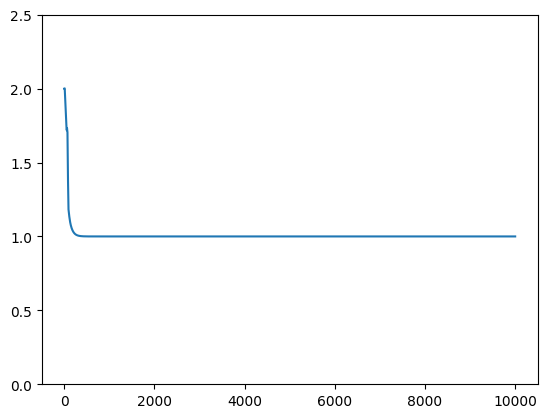

In [9]:
np.random.seed(130)

# number of hidden units
n_hidden = 3
# learning rate
lr = 0.001
# number of epochs
epochs = 10_000

# weight and bias matrices for the hidden layer
W_hidden = np.random.randn(n_hidden, 2)  # n_hidden rows and two columns, we 
# are therefore doing W*x with x a column vector (to match the slides).
# The same would obviously work with x*W with x a line vector.
b_hidden = np.zeros((n_hidden))  # b_hidden can be considered as a vector, 
# a matrix would work but isn't necessary. It will have to be transposed
# as vectors are line vectors in Python.

# weight and bias matrices for the output layer
W_out = np.random.randn(1, n_hidden)
b_out = np.zeros((1))

# activation function
def relu(x):
    return x.clip(0,None)
# and its derivative
def relu_derivative(x):
    return 1*(x>=0)


def forward(X):
    # number of samples
    n_samples = X.shape[0]  # n_samples is 4 here
    # hidden layer activations
    hidden_activations = np.zeros((n_samples, W_hidden.shape[0]))
    # output layer activations
    output_activations = np.zeros((n_samples, W_out.shape[0]))
    # loss
    loss = 0
    for i in range(n_samples):
        hidden_activations[i] = relu(W_hidden @ X[i].T + b_hidden.T)  # layer 1
        output_activations[i] = relu(W_out @ hidden_activations[i] + b_out)  # y_hat
        loss += (y_train[i] - output_activations[i]) ** 2
    return hidden_activations, output_activations, loss

    # It's also important to note that this solution is not the most efficient, 
    # especially when you have a large dataset. But for the sake of clarity,
    # it is more understandable if we iterate over the samples in X to calculate
    # the hidden_activations and output_activations for each sample.

def backward(X, y_train, hidden_activations, output_activations):
    # global variables because we are going to change them and we need the
    # change to only be done locally
    global W_hidden, b_hidden, W_out, b_out

    n_samples = X.shape[0]  # n_samples is 4 here
    # update weight matrices and biases

    for i in range(n_samples):
        for j in range(n_hidden):
            W_out[0][j] -= lr * 2 * (output_activations[i].item() - y_train[i].item()) * relu_derivative(output_activations[i].item()) * hidden_activations[i][j].item()
        b_out -= lr * 2 * (output_activations[i].item() - y_train[i].item()) * relu_derivative(output_activations[i].item())

        for j in range(n_hidden):
            for k in range(2):  # because W_hidden is a matrix n_hidden rows, 2 columns
                W_hidden[j][k] -= lr * 2 * (output_activations[i].item() - y_train[i].item()) * relu_derivative(output_activations[i].item()) * W_out[0][j] * relu_derivative(hidden_activations[i][j].item()) * X[i][k].item()
            b_hidden[j] -= lr * 2 * (output_activations[i].item() - y_train[i].item()) * relu_derivative(output_activations[i].item()) * W_out[0][j].item() * relu_derivative(hidden_activations[i][j].item())


losses = np.zeros(epochs)
for epoch in range(epochs):
    # train
    hidden_activations, output_activations, loss = forward(X_train)
    backward(X_train, y_train, hidden_activations, output_activations)
    # save & print the loss
    losses[epoch] = loss.item()
    if epoch % 1000 == 0:
        print(f"Epoch {epoch}: loss = {loss}")

# semilogy of the loss
plt.plot(losses)
plt.ylim(0, 2.5)
plt.show()